<a href="https://colab.research.google.com/github/Nidzoki/PMFSTMachineLearning/blob/main/v2/v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
%cd /content/drive/MyDrive
housing_df = pd.read_csv('housing.csv')

/content/drive/MyDrive


In [62]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


###Zadatak 1

In [63]:
print("Broj primjera: ", housing_df.shape[0])
print("Broj značajki: ", housing_df.shape[1])
housing_df.info()

Broj primjera:  20640
Broj značajki:  10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


###Zadatak 2

In [64]:
print("Broj nedostajućih vrijednosti: ", housing_df.isna().sum())

Broj nedostajućih vrijednosti:  longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


##### U stupcu total bedrooms nalazi se 207 vrijednosti koje nedostaju

In [65]:
# punjenje stupca medijanom

housing_df['total_bedrooms'] = housing_df['total_bedrooms'].fillna(housing_df['total_bedrooms'].median())

### Zadatak 3 Ima li duplikata i ako ima izbaci

In [66]:
print("Nema" if housing_df.duplicated().sum() == 0 else "Ima")

Nema


### Zadatak 4 Eksplorativna analiza

In [67]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [68]:
cat_cols = housing_df.select_dtypes(include='object').columns
num_cols = housing_df.select_dtypes(exclude='object').columns

In [69]:
housing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20640.0,536.838857,419.391878,1.0000,297.0000,435.0000,643.25000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


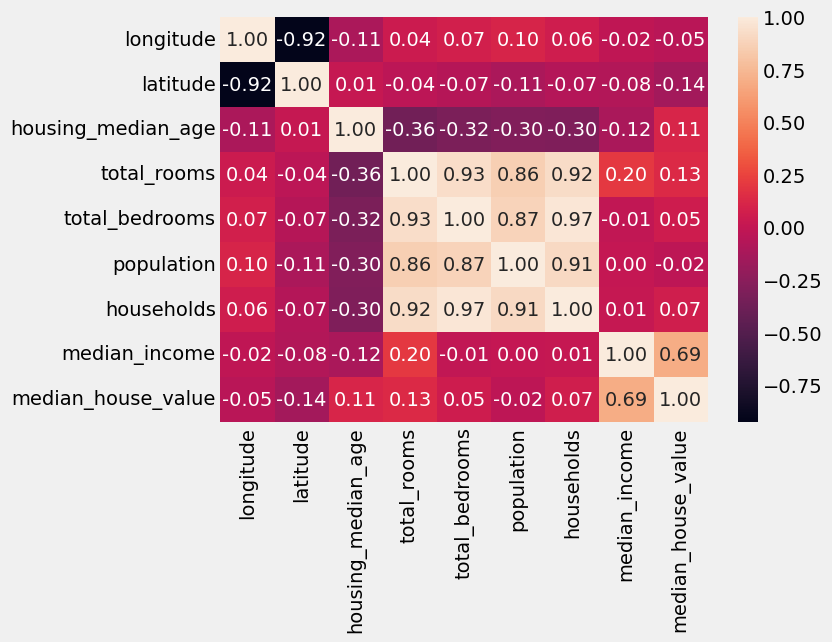

In [70]:
housing_numerical = housing_df.select_dtypes(include=np.number)
corr_matrix = housing_numerical.corr(method="pearson")
plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap="rocket", fmt='.2f')
plt.show()

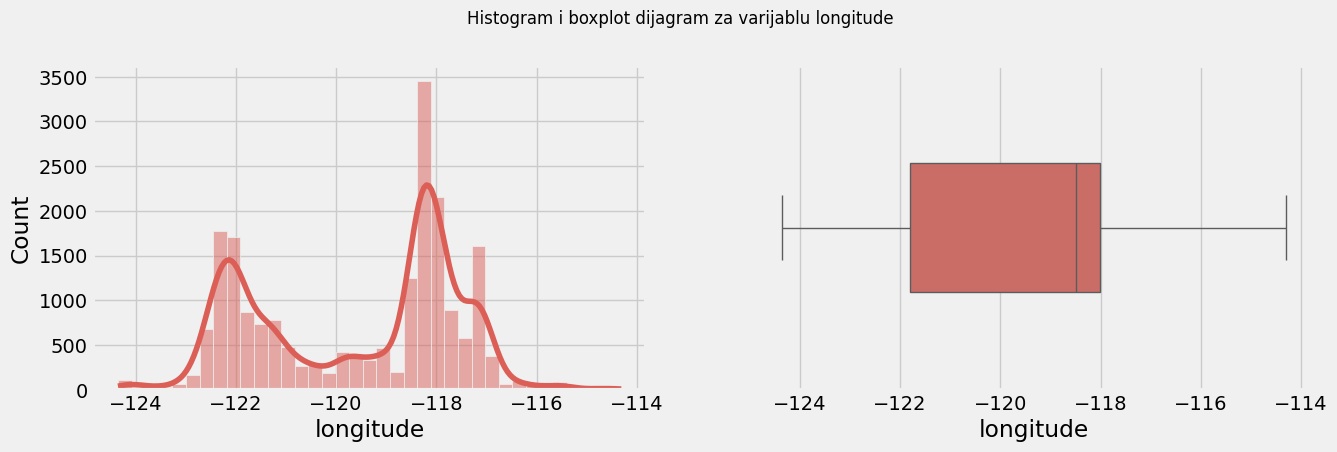

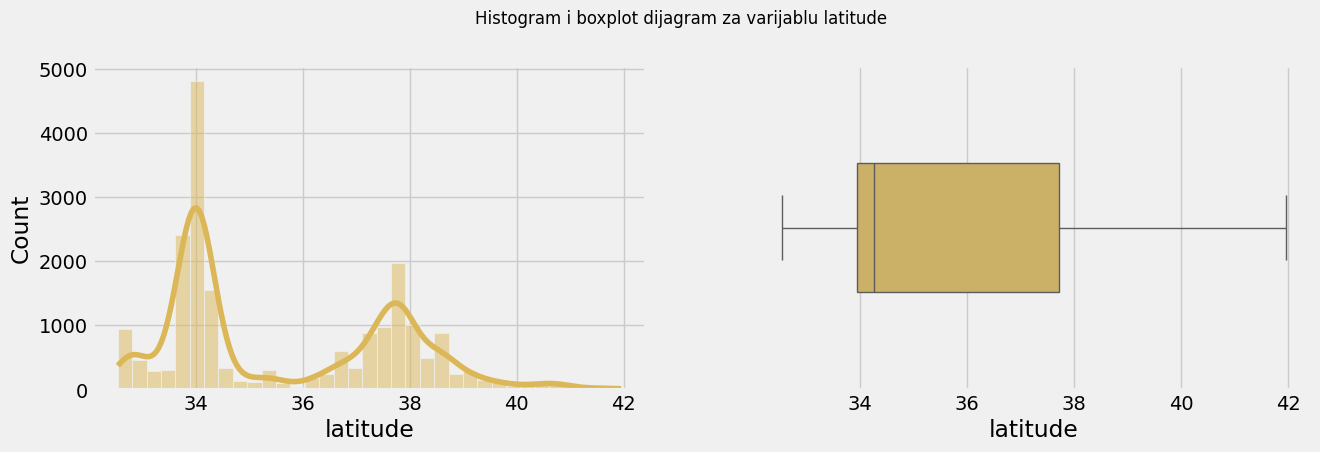

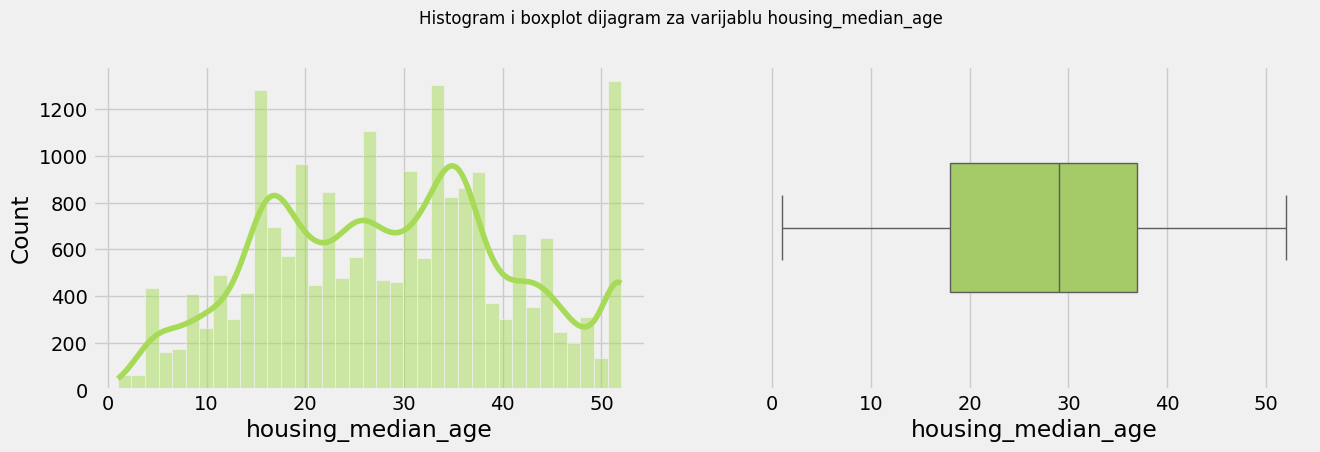

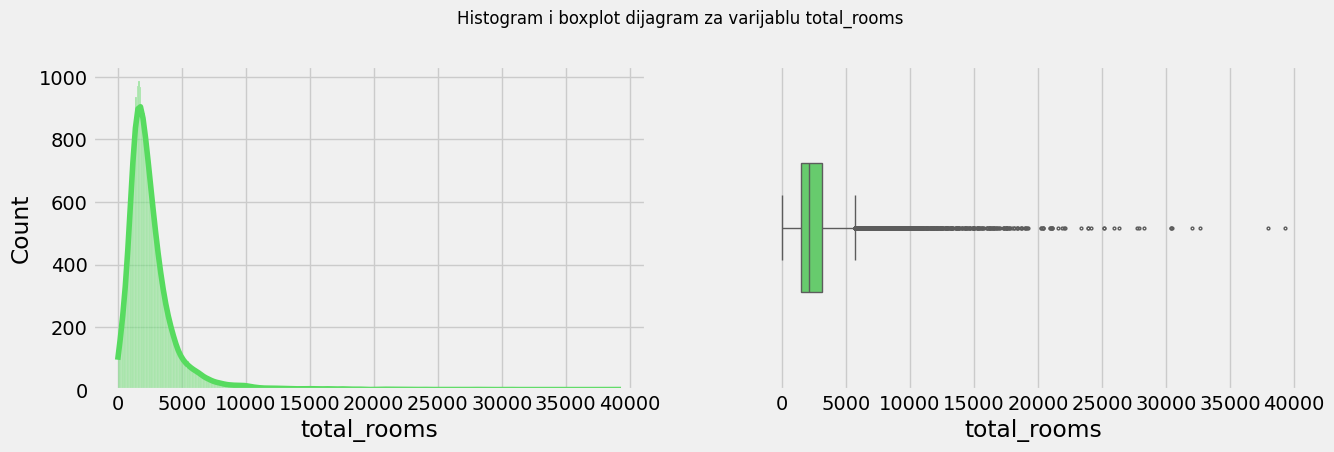

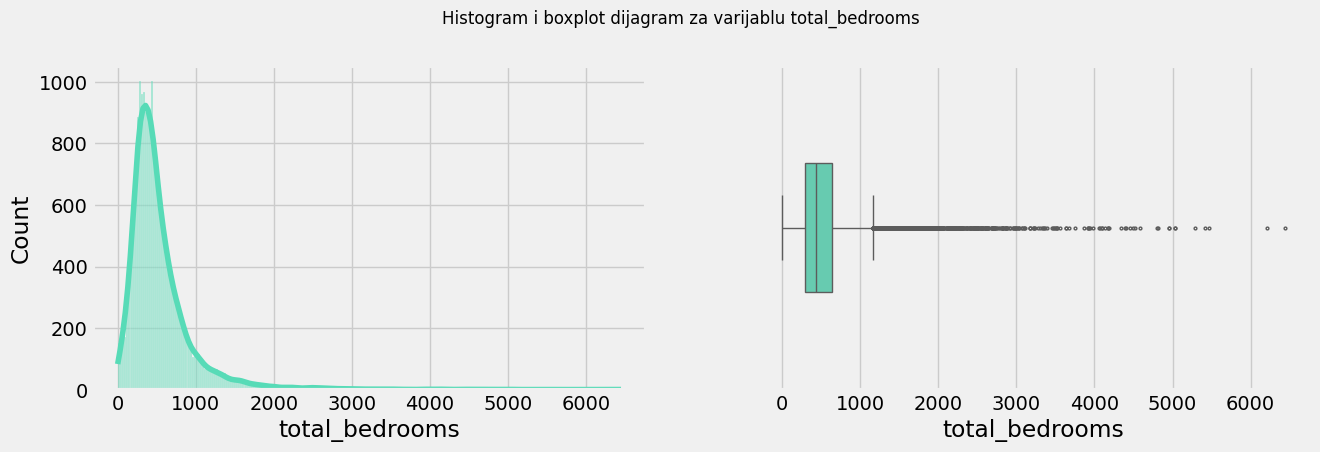

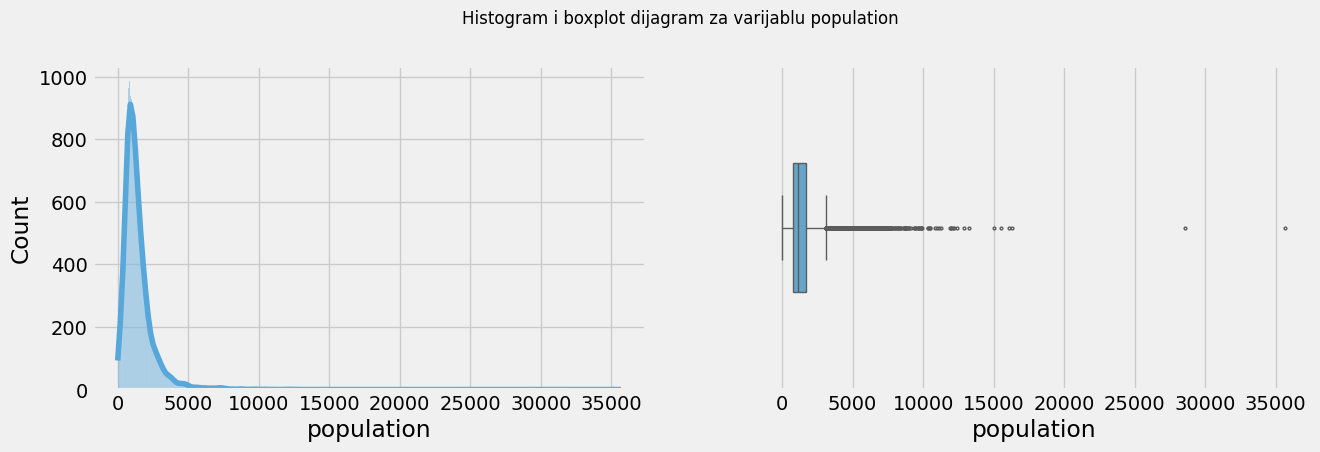

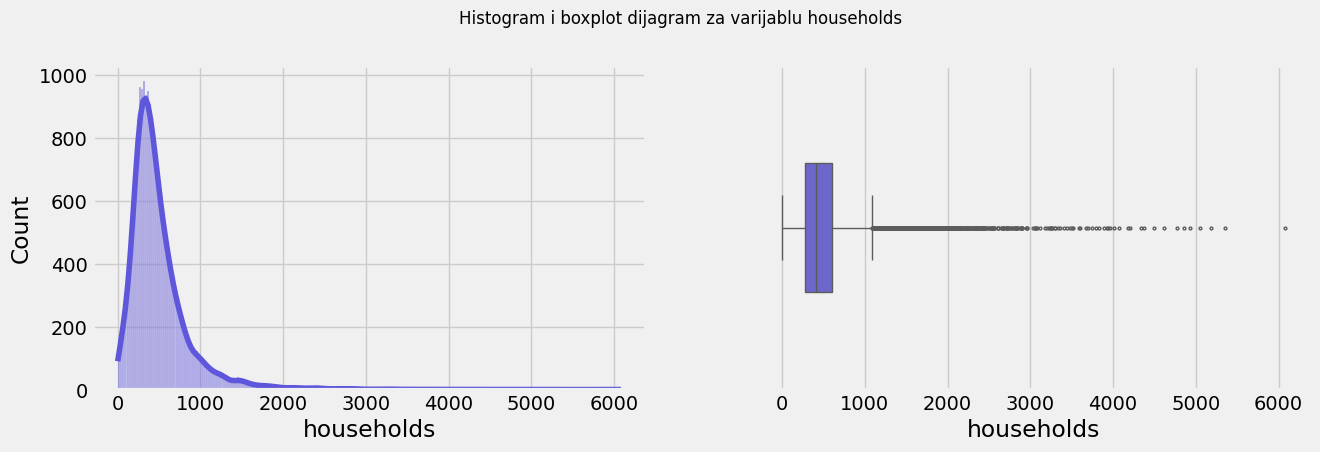

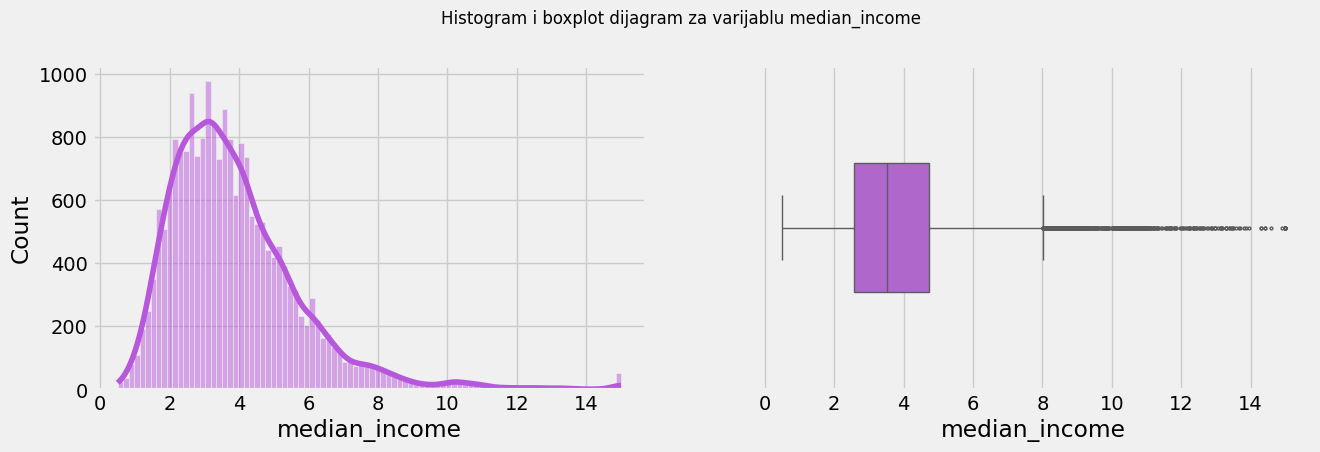

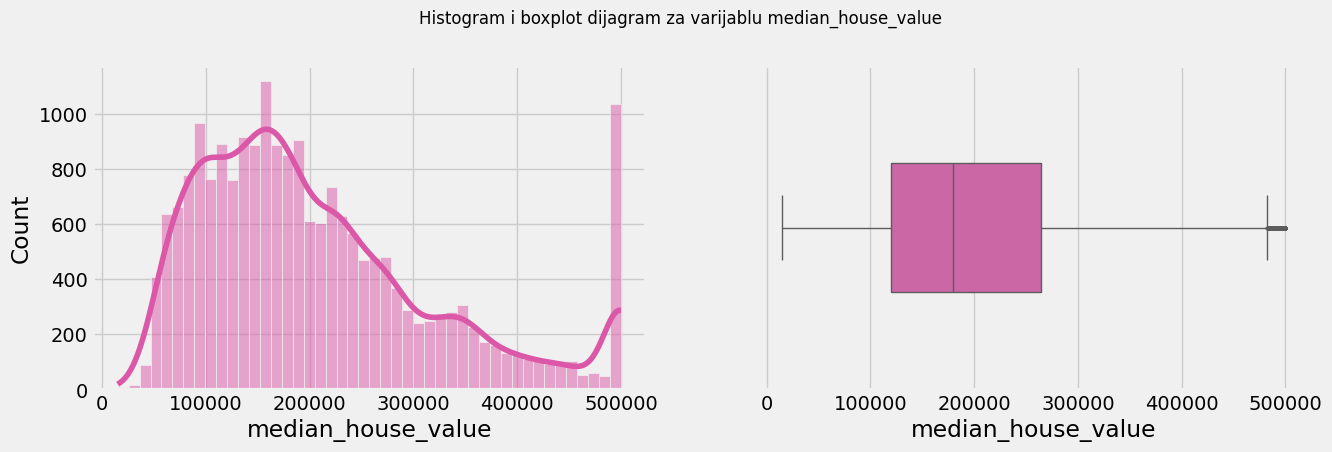

In [71]:
for idx, col in enumerate(num_cols):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 4))

  # Histogram
  sns.histplot(housing_df,
               x=housing_df[col],
               kde=True,
               color=sns.color_palette("hls", len(num_cols))[idx],
               ax=ax1)

  # Boxplot dijagram
  sns.boxplot(x=housing_df[col],
              width=0.4,
              linewidth=1,
              fliersize=2,
              color=sns.color_palette("hls", len(num_cols))[idx],
              ax=ax2)

  fig.suptitle(f"Histogram i boxplot dijagram za varijablu {col}", size = 12, y = 1.02)

  plt.show()

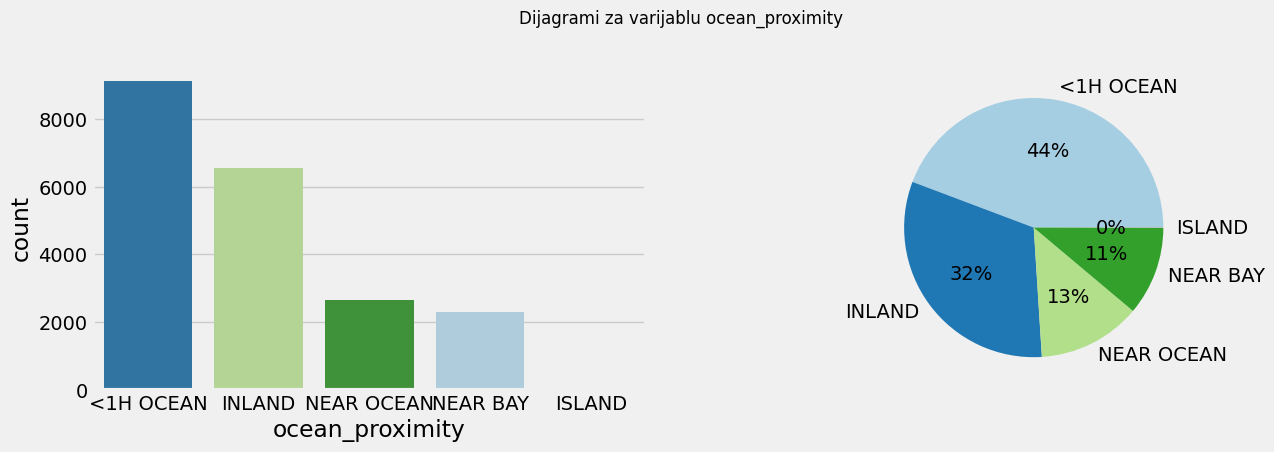

In [72]:
for idx, col in enumerate(cat_cols):

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 4))
  size_per_category = housing_df.groupby(col).size().sort_values(ascending=False)

  ax = sns.countplot(x=housing_df[col],
                     order=size_per_category.index,
                     ax=ax1,
                     hue=housing_df['ocean_proximity'],
                     palette='Paired')

  colors = sns.color_palette('Paired')[0:len(size_per_category)]
  ax = plt.pie(size_per_category,
               labels=size_per_category.index,
               autopct='%.0f%%',
               colors=colors)

  fig.suptitle(f"Dijagrami za varijablu {col}", size = 12, y = 1.02)
  plt.show()

Analiziramo korelaciju značajki s ciljnom varijablom `median_house_value`, analiziramo kategoričku značajku `ocean_proximity` i kreiramo nove značajke

## Analiza korelacije s ciljnom varijablom


In [73]:
correlation_with_target = housing_numerical.corr(method="pearson")['median_house_value'].sort_values(ascending=False)
print("Korelacija numeričkih značajki sa ciljnom varijablom 'median_house_value':")
print(correlation_with_target)

Korelacija numeričkih značajki sa ciljnom varijablom 'median_house_value':
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


## Analiza kategoričke značajke

Ispitat ćemo odnos između kategoričke značajke `ocean_proximity` i `median_house_value` kako bismo vidjeli može li se koristiti u modelu.


In [74]:
ocean_proximity_mean = housing_df.groupby('ocean_proximity')['median_house_value'].mean()
print("Srednja vrijednost median_house_value po ocean_proximity kategoriji:")
print(ocean_proximity_mean)

Srednja vrijednost median_house_value po ocean_proximity kategoriji:
ocean_proximity
<1H OCEAN     240084.285464
INLAND        124805.392001
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
Name: median_house_value, dtype: float64


## Kreiranje novih značajki


In [75]:
housing_df['rooms_per_household'] = housing_df['total_rooms'] / housing_df['households']
housing_df['bedrooms_per_room'] = housing_df['total_bedrooms'] / housing_df['total_rooms']
housing_df['population_per_household'] = housing_df['population'] / housing_df['households']
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


## Predprocesiranje podataka

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

housing_features = housing_df.drop('median_house_value', axis=1)
housing_labels = housing_df['median_house_value']

cat_cols = housing_features.select_dtypes(include='object').columns
num_cols = housing_features.select_dtypes(exclude='object').columns

housing_features_encoded = pd.get_dummies(housing_features, columns=cat_cols, drop_first=True)

scaler = StandardScaler()
housing_features_scaled = scaler.fit_transform(housing_features_encoded[num_cols])

housing_features_scaled_df = pd.DataFrame(housing_features_scaled, columns=num_cols, index=housing_features_encoded.index)

housing_features_processed = pd.concat([housing_features_scaled_df, housing_features_encoded.drop(num_cols, axis=1)], axis=1)

display(housing_features_processed.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,0.628559,-1.029988,-0.049597,False,False,True,False
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,0.327041,-0.888897,-0.092512,False,False,True,False
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.155620,-1.291686,-0.025843,False,False,True,False
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,0.156966,-0.449613,-0.050329,False,False,True,False
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,0.344711,-0.639087,-0.085616,False,False,True,False


In [77]:
print("Correlation of numerical features with 'median_house_value':")
print(correlation_with_target)

print("\nCorrelation of newly created features with 'median_house_value':")
new_features_correlation = housing_df[['rooms_per_household', 'bedrooms_per_room', 'population_per_household', 'median_house_value']].corr(method="pearson")['median_house_value'].sort_values(ascending=False)
print(new_features_correlation)

print("\nIs 'ocean_proximity' included in the processed features?")
print('ocean_proximity_INLAND' in housing_features_processed.columns or
      'ocean_proximity_ISLAND' in housing_features_processed.columns or
      'ocean_proximity_NEAR BAY' in housing_features_processed.columns or
      'ocean_proximity_NEAR OCEAN' in housing_features_processed.columns or
      '<1H OCEAN' in housing_features_processed.columns)

Correlation of numerical features with 'median_house_value':
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

Correlation of newly created features with 'median_house_value':
median_house_value          1.000000
rooms_per_household         0.151948
population_per_household   -0.023737
bedrooms_per_room          -0.233303
Name: median_house_value, dtype: float64

Is 'ocean_proximity' included in the processed features?
True


In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(housing_features_processed, housing_labels, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (16512, 15)
Shape of X_test: (4128, 15)
Shape of y_train: (16512,)
Shape of y_test: (4128,)
